In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Connection Between SVD and Principal Component Analysis (PCA)

Principal component analysis (PCA) is a linear dimensionality reduction technique.
We typically use PCA in supervised or unsupervised learning to reduce the number of features in the dataset.
The main idea behind PCA is to find a new set of features that are uncorrelated and ordered by the amount of variance they explain.

Let $\mathbf{X}$ be a $n \times m$ matrix, where $n$ is the number of samples and $m$ is the number of features.
In this setting, we typically have $n \ll m$.
We will use $\mathbf{x}_i$ to denote the $i$-th row of $\mathbf{X}$.
So, write:

$$
% straight line

\mathbf{X} = \begin{bmatrix}
-\mathbf{x}_1- \\
-\mathbf{x}_2-\\
\vdots \\
-\mathbf{x}_n-
\end{bmatrix},
$$

where:

$$
-\mathbf{x}_j- \equiv \mathbf{x}_j^T.
$$

When we do PCA, we always want to center the data.
To this, end we calculate the empirical mean of the data:

$$
\bar{x} = \langle \mathbf{x}_i \rangle = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i,
$$

and we make the centered data matrix:

$$
\mathbf{B} = \mathbf{X} - \bar{x} = \begin{bmatrix}
-\mathbf{x}_1-\bar{x}- \\
-\mathbf{x}_2-\bar{x}- \\
\vdots \\
-\mathbf{x}_n-\bar{x}-
\end{bmatrix}.
$$

Now take an arbitrary unit vector $\mathbf{v}$.
A little visualization helps to understand the PCA.

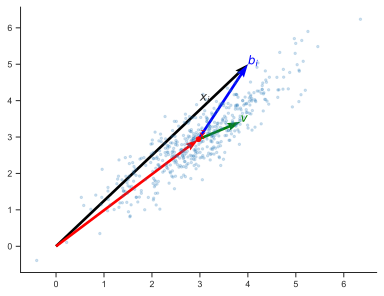

In [39]:
import numpy as np
A = np.linalg.cholesky([[1, 0.9], [0.9, 1]])
X = (np.array([3, 3])[:, None] + A @ np.random.randn(2, 500)).T
bar_x = X.mean(axis=0)
v = np.array([np.cos(0.5), np.sin(0.5)])
x_i = np.array([4, 5])
b_i = x_i - bar_x
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], '.', alpha=0.2)
ax.plot(bar_x[0], bar_x[1], 'o', color='red')
ax.quiver(0, 0, x_i[0], x_i[1], angles='xy', scale_units='xy', scale=1)
ax.text(3, 4, '$x_i$', fontsize=12)
ax.quiver(0, 0, bar_x[0], bar_x[1], angles='xy', scale_units='xy', scale=1, color='red')
ax.text(bar_x[0], bar_x[1], '$\\bar{x}$', fontsize=12, color='red')
ax.quiver(bar_x[0], bar_x[1], v[0], v[1], angles='xy', scale_units='xy', scale=1, color='green')
ax.text(bar_x[0] + v[0], bar_x[1] + v[1], '$v$', fontsize=12, color='green')
ax.quiver(bar_x[0], bar_x[1], b_i[0], b_i[1], angles='xy', scale_units='xy', scale=1, color='blue')
ax.text(bar_x[0] + b_i[0], bar_x[1] + b_i[1], '$b_i$', fontsize=12, color='blue')
sns.despine();

Consider the projection of $\mathbf{b}_i$ on $\mathbf{v}$.
It is:

$$
\text{Proj}_i = \mathbf{b}_i^T \mathbf{v}.
$$

What is the empirical mean of the projections?

$$
\langle \text{Proj}_i \rangle = \langle \mathbf{b}_i^T \mathbf{v} \rangle = \langle \mathbf{b}_i\rangle^T \mathbf{v} = 0,
$$

because $\mathbf{b}_i$ is centered.

What is the variance of the projections?

$$
\langle \text{Proj}_i^2\rangle = \langle \mathbf{v}^T\mathbf{b}_i \mathbf{b}_i^T \mathbf{v} \rangle = \mathbf{v}^T \langle \mathbf{b}_i \mathbf{b}_i^T \rangle \mathbf{v} = \mathbf{v}^T \mathbf{C} \mathbf{v},
$$

where $\mathbf{C}$ is the covariance matrix of the centered data:

$$
\mathbf{C} = \frac{1}{n} \mathbf{B}^T \mathbf{B}.
$$

PCA, finds $\mathbf{v}$ by solving the following problem:

$$
\mathbf{v}_1 = \arg\max \mathbf{v}^T \mathbf{C} \mathbf{v},
$$

subject to the constraint that $\mathbf{v}$ is a unit vector.

Using the method of Lagrange multipliers, we can show that the solution to this problem is the eigenvector of $\mathbf{C}$ with the largest eigenvalue.

In a similar way, we can find the second principal direction, $\mathbf{v}_2$.
And so on.
We always get a sequence of orthogonal unit vectors, $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_m$, corresponding to the largest $m$ eigenvalues of $\mathbf{C}$.

And now, here is the connection between PCA and SVD.
Do the SVD of the centered matrix $\mathbf{B}$:

$$
\mathbf{B} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T.
$$

Form the covariance:

$$
\mathbf{C} = \frac{1}{n} \mathbf{B}^T \mathbf{B} = \frac{1}{n} \mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T = \frac{1}{n} \mathbf{V} \mathbf{\Sigma}^2 \mathbf{V}^T.
$$

So, we get that the SVD diagonalizes the covariance matrix.
We can read of the eigenvalues and eigenvectors.
The $j$-th column of $\mathbf{V}$ is the $j$-th principal direction.
The $j$-th singular value squared and divided by $n$ is the variance in the $j$-th principal direction.

The total variance of the data is:

$$
\text{Tr}(\mathbf{C}) = \frac{1}{n} \text{Tr}(\mathbf{B}^T \mathbf{B}) = \frac{1}{n} \text{Tr}(\mathbf{V} \mathbf{\Sigma}^2 \mathbf{V}^T) = \frac{1}{n} \text{Tr}(\mathbf{\Sigma}^2) = \sum_{j=1}^m \frac{\sigma_j^2}{n}.
$$

The projection coefficients are known as the principal components.
They are:

$$
\mathbf{Z} = \mathbf{X} \mathbf{V} = \mathbf{U} \mathbf{\Sigma}.
$$

## The principal components are uncorrelated

Let $\mathbf{z}_i$ be the $i$-th row of $\mathbf{Z}$.
Then:

$$
\langle z_{ik}z_{il}\rangle = \langle u_{ik}\sigma_k u_{il}\sigma_l\rangle
= \sigma_k \sigma_l \langle u_{ik} u_{il}\rangle = \frac{\sigma_k^2}{n} \delta_{kl}.
$$

Here we used the Einstein summation convention and the fact that the $u_{ik}$ are orthonormal.